# Символьная математика с Sympy

[Sympy](http://www.sympy.org/en/index.html) описывается как:

> "... Python library for symbolic mathematics."

Это означает, что `Sympy` можно использовать для:

- Работа с символическими выражениями;
- Решать символьные уравнения;
- Проводить символическое исчисление;
- Построение символьной графики.

Подробнее о возможностях `Sympy` можно прочитать здесь: http://www.sympy.org/en/index.html.

## Работа с символическими выражениями

Импортируем библиотеку `Sympy`.

In [1]:
import sympy as sym

Импорт библиотеки дает доступ к ее командам, используя сокращение `sym`.

При  попытке проверки выражения $x - x = 0$, получим ошибку, если предварительно не описать в Python переменную $x$.

Здесь на помощь приходит `Sympy`: мы можем указать Python создать $x$ в качестве символьной переменной:

In [2]:
x = sym.symbols('x')

Теперь мы можем вычислить $x - x$:

In [ ]:
x - x

Мы можем создавать выражения и манипулировать ими в Sympy. Давайте, например, проверим:

$$(a + b) ^ 2 = а ^ 2 + 2ab + b ^2$$

Сначала мы создаем символьные переменные $a, b$:

In [4]:
a, b = sym.symbols('a, b')

Теперь давайте создадим наше выражение:

In [5]:
expr = (a + b) ** 2
expr

(a + b)**2

**Примечание**  в `Sympy` можно использовать LaTeX-разметку, чтобы результат выглядел в более удобно читаемом виде:

In [6]:
sym.init_printing()

In [ ]:
expr

Раскроем скобки в выражении:

In [6]:
expr.expand()

a**2 + 2*a*b + b**2

Обратите внимание, что  в `Sympy` можно создать код LaTeX для дальнейшего применения:

In [7]:
sym.latex(expr.expand())

'a^{2} + 2 a b + b^{2}'

---
**УПРАЖНЕНИЕ 1** Используйте Sympy, чтобы проверить следующие выражения:

- $(a - b) ^ 2 = a ^ 2 - 2 a b + b^2$
- $a ^ 2 - b ^ 2 = (a - b) (a + b)$ (вместо использования `expand` попробуйте `factor`)

In [27]:
# Решение 
a, b = sym.symbols('a b')

expr1 = (a - b) ** 2
expr2 = a ** 2 - 2 * a * b + b ** 2

expr3 = a ** 2 - b ** 2
expr4 = (a - b) * (a + b)

print(sym.expand(sym.Eq(expr1, expr2)), sym.expand(sym.Eq(expr3, expr4)))

True True


## Решение символьных уравнений

Мы можем использовать `Sympy` для решения символьных выражений. Например, найдем неизвестное $x$ квадратного уравнения:
$$a x ^ 2 + b x + c = 0$$

In [10]:
a, b, c, x = sym.symbols('a, b, c, x')

Команда в `Sympy` для решения уравнений — `solveset`. Первый аргумент — это выражение, для которого будет найден корень. Второй аргумент — это значение, которое мы ищем.

In [ ]:
sym.solveset(a * x ** 2 + b * x + c, x)

---
** УПРАЖНЕНИЕ 2** Используйте Sympy, чтобы найти решения обобщенного кубического уравнения:

$$a x ^ 3 + b x ^ 2 + c  x + d = 0$$

---

In [17]:
# Решение
a, b, c, d, x = sym.symbols('a, b, c, d, x')
sym.solveset(a * x ** 3 + b * x ** 2 + c * x + d, x)

{-(-3*c/a + b**2/a**2)/(3*(sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)) - (sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)/3 - b/(3*a), -(-3*c/a + b**2/a**2)/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)/3 - b/(3*a), -(-3*c/a + b**2/a**2)/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)/3 - b/(3*a)}

В `solveset` можно передать больше аргументов, например, чтобы ограничить пространство решений. Давайте посмотрим, что представляет собой решение следующей задачи. $\mathbb{R}$:

$$x^2=-1$$

In [ ]:
sym.solveset(x ** 2 + 1, x, domain=sym.S.Reals)

---
** УПРАЖНЕНИЕ 3** Используйте Sympy, чтобы найти решения следующих уравнений:

- $x ^ 2 == 2$ in $\mathbb{N}$;
- $x ^ 3 + 2 x = 0$ in $\mathbb{R}$.

---

In [24]:
# Решение:
# 1
x = sym.symbols('x')
sym.solveset(x ** 2 - 2, x, domain=sym.S.Naturals)

EmptySet

In [20]:
# 2
x = sym.symbols('x')
sym.solveset(x ** 3 + 2 * x, x, domain=sym.S.Reals)

{0}

## Символьное исчисление

`Sympy` также используют для вычисления пределов. Давайте посчитаем:

$$\lim_{x\to 0^+}\frac{1}{x}$$

In [ ]:
sym.limit(1/x, x, 0, dir="+")

---
**УПРАЖНЕНИЕ 4** Рассчитайте следующие пределы:

1. $\lim_{x\to 0^-}\frac{1}{x}$
2.  $\lim_{x\to 0}\frac{1}{x^2}$

---

In [29]:
# Решение 
# 1
sym.limit(1/x, x, 0, dir="-")

-oo

In [30]:
# 2 
sym.limit(1/(x ** 2), x, 0)

oo

Можно использовать `Sympy` для дифференцирования и интегрирования.Продифференцируем следующее выражения:


$$x ^ 2 - \cos(x)$$

In [ ]:
sym.diff(x ** 2 - sym.cos(x), x)

Аналогично можно интегрировать:

In [ ]:
sym.integrate(x ** 2 - sym.cos(x), x)

Включена возможность расчета определенных интегралов:

In [ ]:
sym.integrate(x ** 2 - sym.cos(x), (x, 0, 5))

---

**УПРАЖНЕНИЕ 5** Используйте Sympy, чтобы рассчитать следующие выражения:

1. $\frac{d\sin(x ^2)}{dx}$
2. $\frac{d(x ^2 + xy - \ln(y))}{dy}$
3. $\int e^x \cos(x)\;dx$
4. $\int_0^5 e^{2x}\;dx$

In [31]:
# Решение
# 1
sym.diff(sym.sin(x ** 2), x)

2*x*cos(x**2)

In [32]:
# 2
x, y = sym.symbols('x, y')
sym.diff(x ** 2 + x * y - sym.ln(y), y)

x - 1/y

In [33]:
# 3
sym.integrate(sym.exp(x) * sym.cos(x), x)

exp(x)*sin(x)/2 + exp(x)*cos(x)/2

In [34]:
# 4
sym.integrate(sym.exp(2 * x), (x, 0, 5))

-1/2 + exp(10)/2

## Построение графика с помощью Sympy

Наконец, `Sympy` можно использовать для построения графиков функций. Обратите внимание, что здесь используется другая библиотека Python под названием [matplotlib](http://matplotlib.org/). Хотя `Sympy` позволяет  не использовать `matplotlib`` напрямую, порой, требуется пользоваться данной библиотекой для более детального построения.

Прежде чем рисовать графики в `Jupyter`, требуется запустить команду, чтобы он отображал графики прямо в блокноте:

In [35]:
%matplotlib inline

Let us plot $x^2$:

In [ ]:
expr = x ** 2
p = sym.plot(expr);

Можно напрямую сохранить этот график в файл:

In [ ]:
p.save("x_squared.pdf");

---
**УПРАЖНЕНИЕ 6** Постройте графики следующих функций:

- $y=x + cos(x)$
- $y=x ^ 2 - e^x$ (вам может пригодиться `ylim` в качестве аргумента)

Поэкспериментируйте с сохранением графиков в файл..

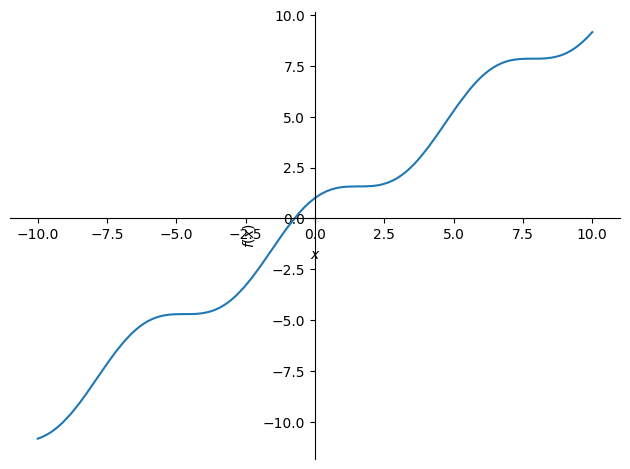

In [36]:
# Решение
# 1
expr = x + sym.cos(x)
p = sym.plot(expr)

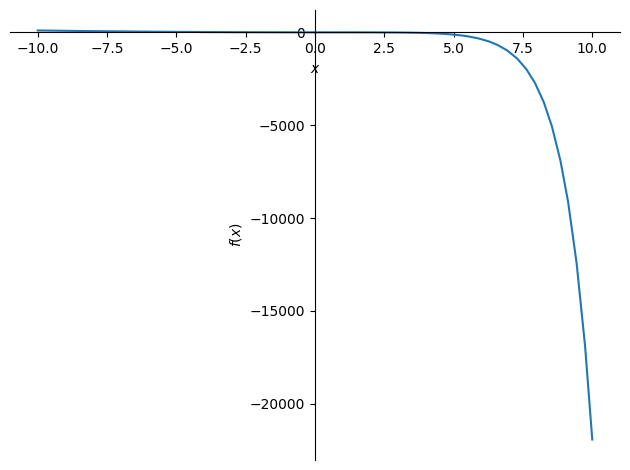

In [37]:
# 2
expr = x ** 2 - sym.exp(x)
p = sym.plot(expr)